## 1. Implementation of a Shallow Neural Network in Keras using Moons dataset

In [7]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
# https://www.codegrepper.com/code-examples/python/AttributeError%3A+module+%27tensorflow%27+has+no+attribute+%27get_default_graph%27
import tensorflow as tf
tf.compat.v1.reset_default_graph()

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import keras
# from tensorflow import keras
from mpl_toolkits import mplot3d
from matplotlib import cm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from keras import backend as K
from tensorflow.keras import backend as k
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
plt.style.use('ggplot')

### Create an artificial dataset

In [63]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# generate two datasets and print their shape
X,y = make_moons(n_samples = 6000, noise = 0.08)
print('X:\t{}' .format(X.shape))
print('y:\t{}' .format(y.shape))

print(type(X))
print(type(y))

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# shape of training and test set
print('X_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

X:	(6000, 2)
y:	(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X_train:	(4020, 2)
y_train:	(4020,)
X_test:		(1980, 2)
y_test:		(1980,)


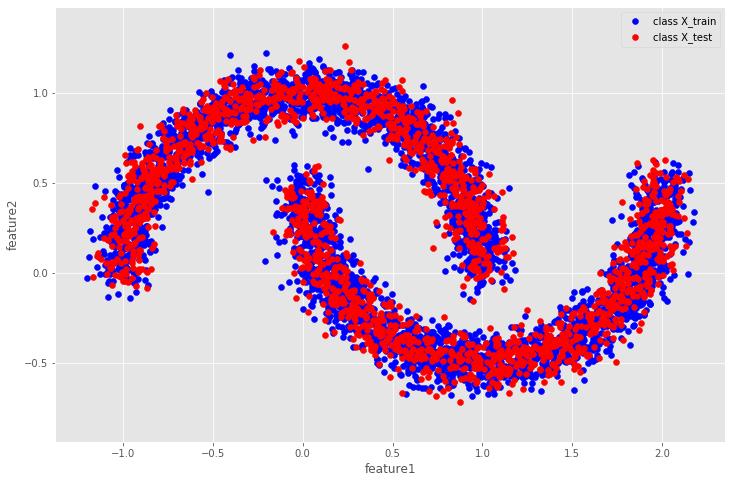

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

## 2. Implementing a Neural Network

In [65]:
# Hyper-parameters
training_epochs = 100 #Total number of training epochs
learning_rate = 0.03 # The learning rate

In [22]:
# model = Sequential()

In [66]:
# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
    # Hidden layer
    model.add(Dense(6, activation='relu'))
    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [67]:
# make a shallow neural network
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [35]:
# y_t = y_train.T
# y_t.shape

(4020,)

In [68]:
# training 
results = model.fit(
     X_train, y_train,
     epochs= training_epochs,
     batch_size = 516,
     validation_data = (X_test, y_test)
)

Train on 4020 samples, validate on 1980 samples
Epoch 1/100
4020/4020 [==============================] - 0s 100us/sample - loss: 0.5918 - accuracy: 0.7898 - val_loss: 0.4265 - val_accuracy: 0.8510
Epoch 2/100
4020/4020 [==============================] - 0s 19us/sample - loss: 0.3525 - accuracy: 0.8485 - val_loss: 0.2664 - val_accuracy: 0.8753
Epoch 3/100
4020/4020 [==============================] - 0s 17us/sample - loss: 0.2643 - accuracy: 0.8749 - val_loss: 0.2538 - val_accuracy: 0.8712
Epoch 4/100
4020/4020 [==============================] - 0s 13us/sample - loss: 0.2611 - accuracy: 0.8749 - val_loss: 0.2446 - val_accuracy: 0.8859
Epoch 5/100
4020/4020 [==============================] - 0s 10us/sample - loss: 0.2549 - accuracy: 0.8799 - val_loss: 0.2372 - val_accuracy: 0.8848
Epoch 6/100
4020/4020 [==============================] - 0s 13us/sample - loss: 0.2468 - accuracy: 0.8808 - val_loss: 0.2342 - val_accuracy: 0.8919
Epoch 7/100
4020/4020 [==============================] - 0s 13u

4020/4020 [==============================] - 0s 15us/sample - loss: 9.3753e-04 - accuracy: 1.0000 - val_loss: 8.9555e-04 - val_accuracy: 1.0000
Epoch 56/100
4020/4020 [==============================] - 0s 10us/sample - loss: 9.2249e-04 - accuracy: 1.0000 - val_loss: 8.3419e-04 - val_accuracy: 1.0000
Epoch 57/100
4020/4020 [==============================] - 0s 10us/sample - loss: 8.4206e-04 - accuracy: 1.0000 - val_loss: 8.3425e-04 - val_accuracy: 1.0000
Epoch 58/100
4020/4020 [==============================] - 0s 6us/sample - loss: 8.5768e-04 - accuracy: 1.0000 - val_loss: 8.0630e-04 - val_accuracy: 1.0000
Epoch 59/100
4020/4020 [==============================] - 0s 7us/sample - loss: 8.2346e-04 - accuracy: 1.0000 - val_loss: 7.7410e-04 - val_accuracy: 1.0000
Epoch 60/100
4020/4020 [==============================] - 0s 10us/sample - loss: 8.2689e-04 - accuracy: 1.0000 - val_loss: 7.6187e-04 - val_accuracy: 1.0000
Epoch 61/100
4020/4020 [==============================] - 0s 14us/sample 

In [43]:
# dir(results)
# dir(results.history)
# type(results.history)
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [69]:
print('Mean value of accuracy during training time is : %.2f' %np.mean(results.history["val_accuracy"]))

Mean value of accuracy during training time is : 0.99


In [70]:
prediction_values = model.predict_classes(X_test)
prediction_values.shape # our neural network outputs predictions of labels for training set

(1980, 1)

In [71]:
print(model.metrics_names[:])

['loss', 'accuracy']


In [72]:
# evaluate the model
scores = model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4020/4020 [==============================] - 0s 31us/sample - loss: 2.9676e-04 - accuracy: 1.0000

accuracy: 100.00%


In [73]:
scores

[0.0002967599549432707, 1.0]

Let’s see how loss and accuracy of prediction change over epochs.

Maximum Loss : 0.5918

Minimum Loss : 0.0003

Loss difference : 0.5915


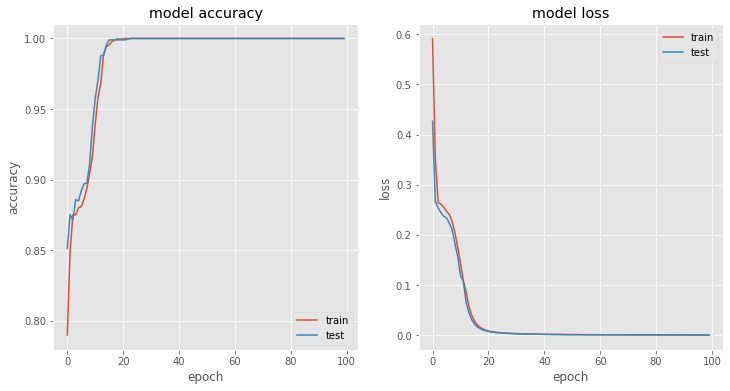

In [74]:
plt.figure(figsize =(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# Visualization

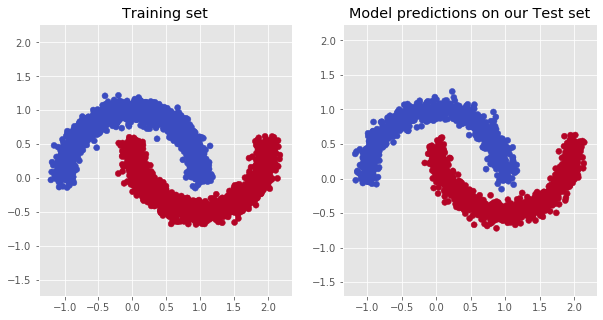

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

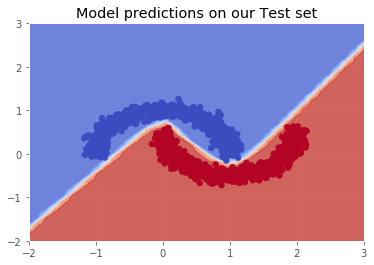

In [76]:
xx = np.linspace(-2, 3, 40)
yy = np.linspace(-2, 3, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 3])
axes.set_ylim([-2, 3])

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

Now, we will print values of weights and biases that we got after training process.

In [77]:
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

Input layer weights (2, 4) :
 [[-0.52350736 -0.62728333  1.4030607   2.6910899 ]
 [ 0.30642277  0.55117255 -0.9235807   0.9938931 ]]
Input layer biases (4,) :
 [ 0.00283826 -0.5278989  -1.7676921  -1.4312387 ]

Hidden layer weights (4, 6) :
 [[-1.7032280e+00 -4.1298679e-04  3.3147440e+00  2.0317876e+00
   1.4301432e+00 -2.0367501e+00]
 [-1.5338104e+00 -5.8676433e-02  4.4566875e+00  1.2763072e+00
   8.9847541e-01 -1.6368880e+00]
 [ 1.3044569e+00  7.1998131e-03  6.1970234e-01 -2.3250556e+00
  -2.2937324e+00  7.2519964e-01]
 [-2.3764613e+00 -6.3942307e-01 -2.7353942e+00  3.5031788e+00
   2.5484369e+00 -2.5901449e+00]]
Hidden layer biases (6,) :
 [ 0.98823583 -0.5731841  -0.7147383   0.48639917  0.5892306   0.9196992 ]

Output layer weights (6, 1) :
 [[ 2.6580029 ]
 [-0.44498262]
 [-4.4740534 ]
 [-2.5134227 ]
 [-2.4510865 ]
 [ 3.035649  ]]
Output layer biases (1,) :
 [0.38422823]


Let’s now see what are the calculations behind every node of our neural network.

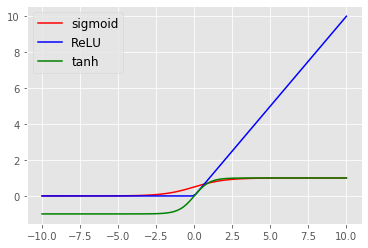

In [78]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def ReLU(z):
    return np.maximum(0,z)
  
def tanh(z):
    return np.tanh(z)
  
z = np.linspace(-10,10,100)
plt.plot(z, sigmoid(z),'r', label = 'sigmoid')
plt.plot(z, ReLU(z),'b',label ='ReLU')
plt.plot(z, tanh(z),'g',label ='tanh')
plt.legend(fontsize=12)

In [82]:
x1 = np.linspace(-2,2,50)
x2 = np.linspace(-2,2,50)
x3 = np.linspace(-1,1,50*50)

result = np.zeros((50*50,3)) 

out11 = np.zeros((50*50, 1))
out12 = np.zeros((50*50, 1))
out13 = np.zeros((50*50, 1))
out14 = np.zeros((50*50, 1))

out21 = np.zeros((50*50, 1))
out22 = np.zeros((50*50, 1))
out23 = np.zeros((50*50, 1))
out24 = np.zeros((50*50, 1))
out25 = np.zeros((50*50, 1))
out26 = np.zeros((50*50, 1))

out31  = np.zeros((50*50, 1))

for i in range(len(x1)):
    for j in range(len(x2)):
        # Input layer
        n11 = x1[i] * weights0[0][0] + x2[j] * weights0[1][0] + biases0[0]
        a11 = tanh(n11)

        n12 = x1[i] * weights0[0][1] + x2[j] * weights0[1][1] + biases0[1]
        a12 = tanh(n12)

        n13 = x1[i] * weights0[0][2] + x2[j] * weights0[1][2] + biases0[2]
        a13 = tanh(n13)

        n14 = x1[i] * weights0[0][3] + x2[j] * weights0[1][3] + biases0[3]
        a14 = tanh(n14)

        # Hidden layer
        n21 = a11 * weights1[0][0] + a12 * weights1[1][0] + a13 * weights1[2][0] + a14 * weights1[3][0] + biases1[0]
        a21 = ReLU(n21)

        n22 = a11 * weights1[0][1] + a12 * weights1[1][1] + a13 * weights1[2][1] + a14 * weights1[3][1] + biases1[1]
        a22 = ReLU(n22)

        n23 = a11 * weights1[0][2] + a12 * weights1[1][2] + a13 * weights1[2][2] + a14 * weights1[3][2] + biases1[2]
        a23 = ReLU(n23)

        n24 = a11 * weights1[0][3] + a12 * weights1[1][3] + a13 * weights1[2][3] + a14 * weights1[3][3] + biases1[3]
        a24 = ReLU(n24)

        n25 = a11 * weights1[0][4] + a12 * weights1[1][4] + a13 * weights1[2][4] + a14 * weights1[3][4] + biases1[4]
        a25 = ReLU(n25)

        n26 = a11 * weights1[0][5] + a12 * weights1[1][5] + a13 * weights1[2][5] + a14 * weights1[3][5] + biases1[5]
        a26 = ReLU(n26)

        # Output layer

        n31 = a21 * weights2[0][0] + a22 * weights2[1][0] \
            + a23 * weights2[2][0] + a24 * weights2[3][0] \
            + a25 * weights2[4][0] + a26 * weights2[5][0] \
            + biases2[0]
        a31 = sigmoid(n31)

        result[i*50+j, 0] = x1[i]
        result[i*50+j, 1] = x2[j]

        out11[i*50+j] = a11
        out12[i*50+j] = a12
        out13[i*50+j] = a13
        out14[i*50+j] = a14
        
        out21[i*50+j] = a21
        out22[i*50+j] = a22
        out23[i*50+j] = a23
        out24[i*50+j] = a24
        out25[i*50+j] = a25
        out26[i*50+j] = a26
        
        out31[i*50+j] = a31
        

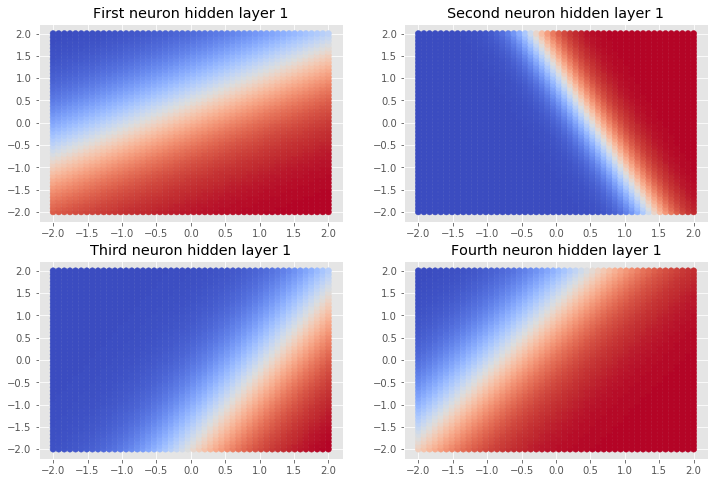

In [79]:
plt.figure(figsize =(12,8))

# First neuron, input layer
plt.subplot(221)
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out11.reshape(-1), cmap=cm.coolwarm)

# Second neuron, input layer
plt.subplot(222)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out12.reshape(-1), cmap=cm.coolwarm)

# Third neuron, input layer
plt.subplot(223)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out13.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, input layer
plt.subplot(224)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out14.reshape(-1), cmap=cm.coolwarm)

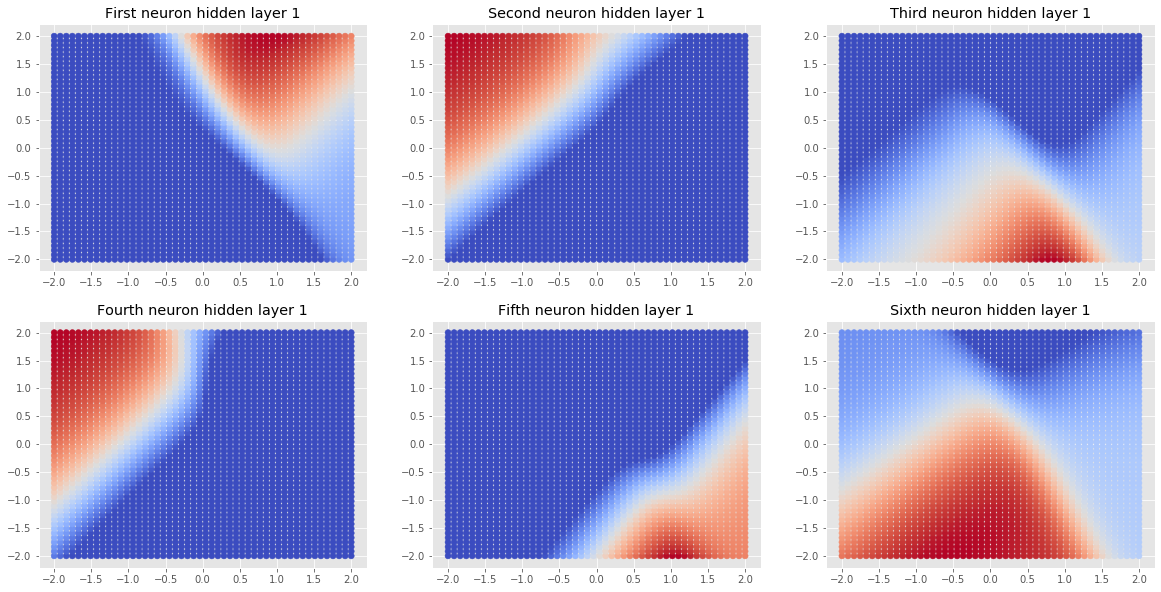

In [80]:
# First neuron, hidden layer
plt.figure(figsize = (20,10))
plt.subplot(231) 
plt.title('First neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out21.reshape(-1), cmap=cm.coolwarm)

# Second neuron, hidden layer
plt.subplot(232)
plt.title('Second neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out22.reshape(-1), cmap=cm.coolwarm)

# Third neuron, hidden layer
plt.subplot(233)
plt.title('Third neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out23.reshape(-1), cmap=cm.coolwarm)

# Fourth neuron, hidden layer
plt.subplot(234)
plt.title('Fourth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out24.reshape(-1), cmap=cm.coolwarm)

# Fifth neuron, hidden layer
plt.subplot(235)
plt.title('Fifth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out25.reshape(-1), cmap=cm.coolwarm)

# Sixth neuron, hidden layer
plt.subplot(236)
plt.title('Sixth neuron hidden layer 1')
plt.scatter(result[:, 0], result[:, 1], c= out26.reshape(-1), cmap=cm.coolwarm)

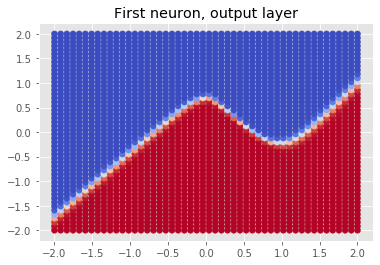

In [83]:
# first neuron, output layer
plt.title('First neuron, output layer')
plt.scatter(result[:, 0], result[:, 1], c= out31.reshape(-1), cmap=cm.coolwarm)

Text(0.5, 0.92, '3D visualization of our neural network first layer fourth neuron')

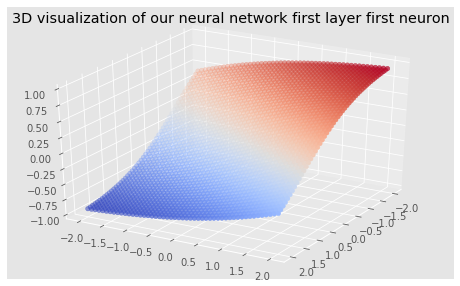

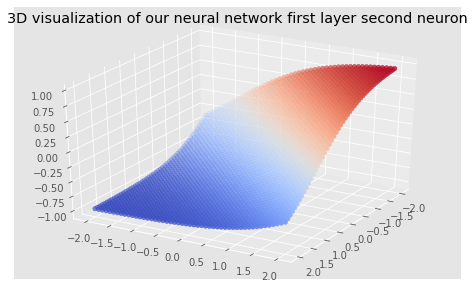

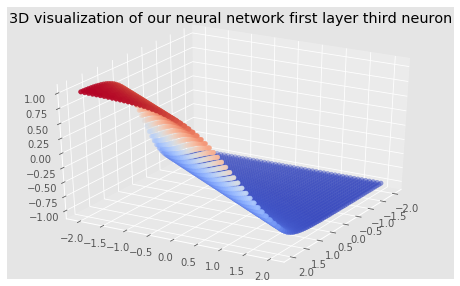

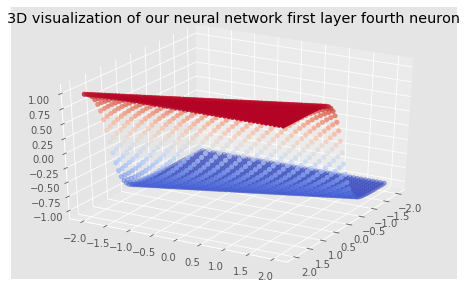

In [84]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out11.reshape(-1), c=out11.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out12.reshape(-1), c=out12.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out13.reshape(-1), c=out13.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out14.reshape(-1), c=out14.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network first layer fourth neuron')

Text(0.5, 0.92, '3D visualization of our neural network second layer sixht neuron')

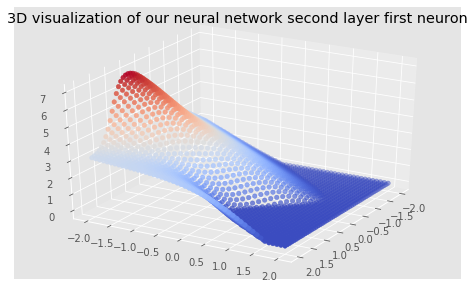

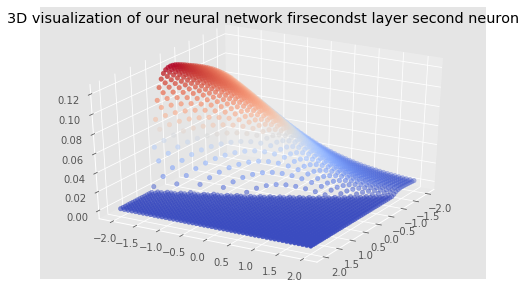

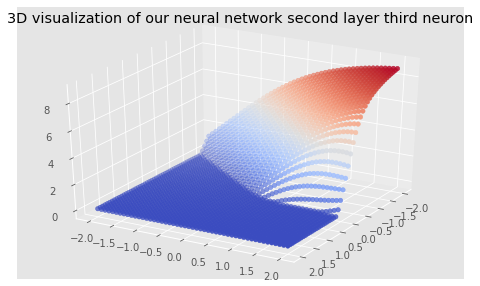

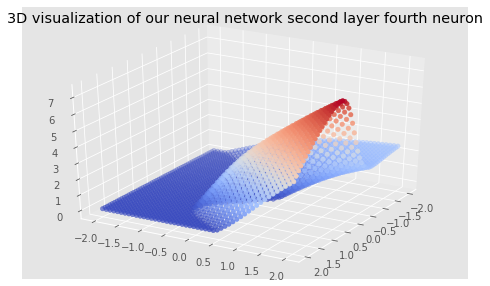

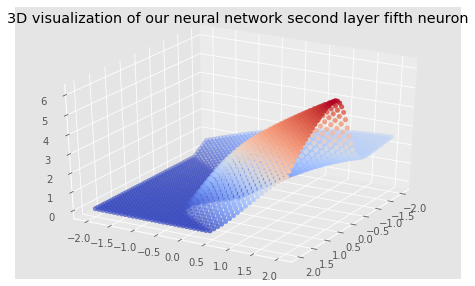

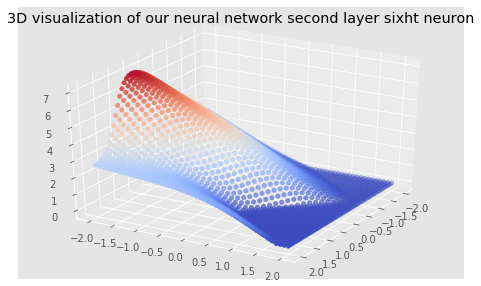

In [85]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out21.reshape(-1), c=out21.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer first neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out22.reshape(-1), c=out22.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network firsecondst layer second neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out23.reshape(-1), c=out23.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer third neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out24.reshape(-1), c=out24.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fourth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out25.reshape(-1), c=out25.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer fifth neuron')

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out26.reshape(-1), c=out26.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30, 30)
ax.set_title('3D visualization of our neural network second layer sixht neuron')

Text(0.5, 0.92, '3D visualization of our neural network output layer first neuron')

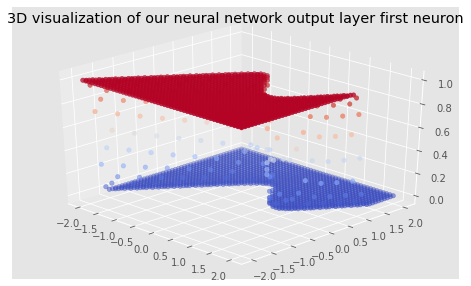

In [86]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d')
bar = ax.scatter3D(result[:, 0],result[:, 1],out31.reshape(-1), c=out31.reshape(-1), cmap=cm.coolwarm);
ax.view_init(30,-45)
ax.set_title('3D visualization of our neural network output layer first neuron')

# Reference

- https://datahacker.rs/implementing-shallow-neural-network-keras-moon-shaped-dataset/
- [Scatter plot with third variable as color](https://www.youtube.com/watch?v=VolIkTkYqMw)